In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline 
sns.set(style="ticks")

In [2]:
train = pd.read_csv('C:/Users/Kotos/Desktop/bookings.csv', sep=",")
train = train.drop_duplicates()

In [3]:
# Размер  датасета -  строки и колоноки
train.shape

(21344, 10)

In [4]:
# Список колонок
train.columns

Index(['hotel', 'market_segment', 'deposit_type', 'lead_time',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'days_in_waiting_list', 'booking_changes', 'total_of_special_requests',
       'is_canceled'],
      dtype='object')

In [5]:
# Список колонок с типами данных 
train.dtypes

hotel                             object
market_segment                    object
deposit_type                      object
lead_time                          int64
previous_cancellations             int64
previous_bookings_not_canceled     int64
days_in_waiting_list               int64
booking_changes                    int64
total_of_special_requests          int64
is_canceled                        int64
dtype: object

In [6]:
train.isnull().sum()

hotel                             0
market_segment                    0
deposit_type                      0
lead_time                         0
previous_cancellations            0
previous_bookings_not_canceled    0
days_in_waiting_list              0
booking_changes                   0
total_of_special_requests         0
is_canceled                       0
dtype: int64

In [7]:
train.head()

,hotel,market_segment,deposit_type,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled
0,Resort Hotel,Direct,No Deposit,342,0,0,0,3,0,0
1,Resort Hotel,Direct,No Deposit,737,0,0,0,4,0,0
2,Resort Hotel,Direct,No Deposit,7,0,0,0,0,0,0
3,Resort Hotel,Corporate,No Deposit,13,0,0,0,0,0,0
4,Resort Hotel,Online TA,No Deposit,14,0,0,0,0,1,0


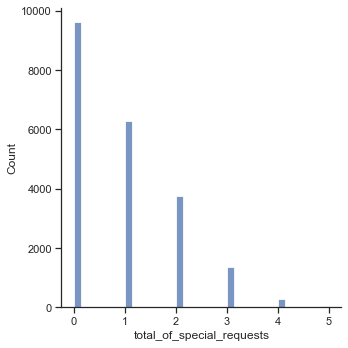

In [8]:
sns.displot(train['total_of_special_requests'])

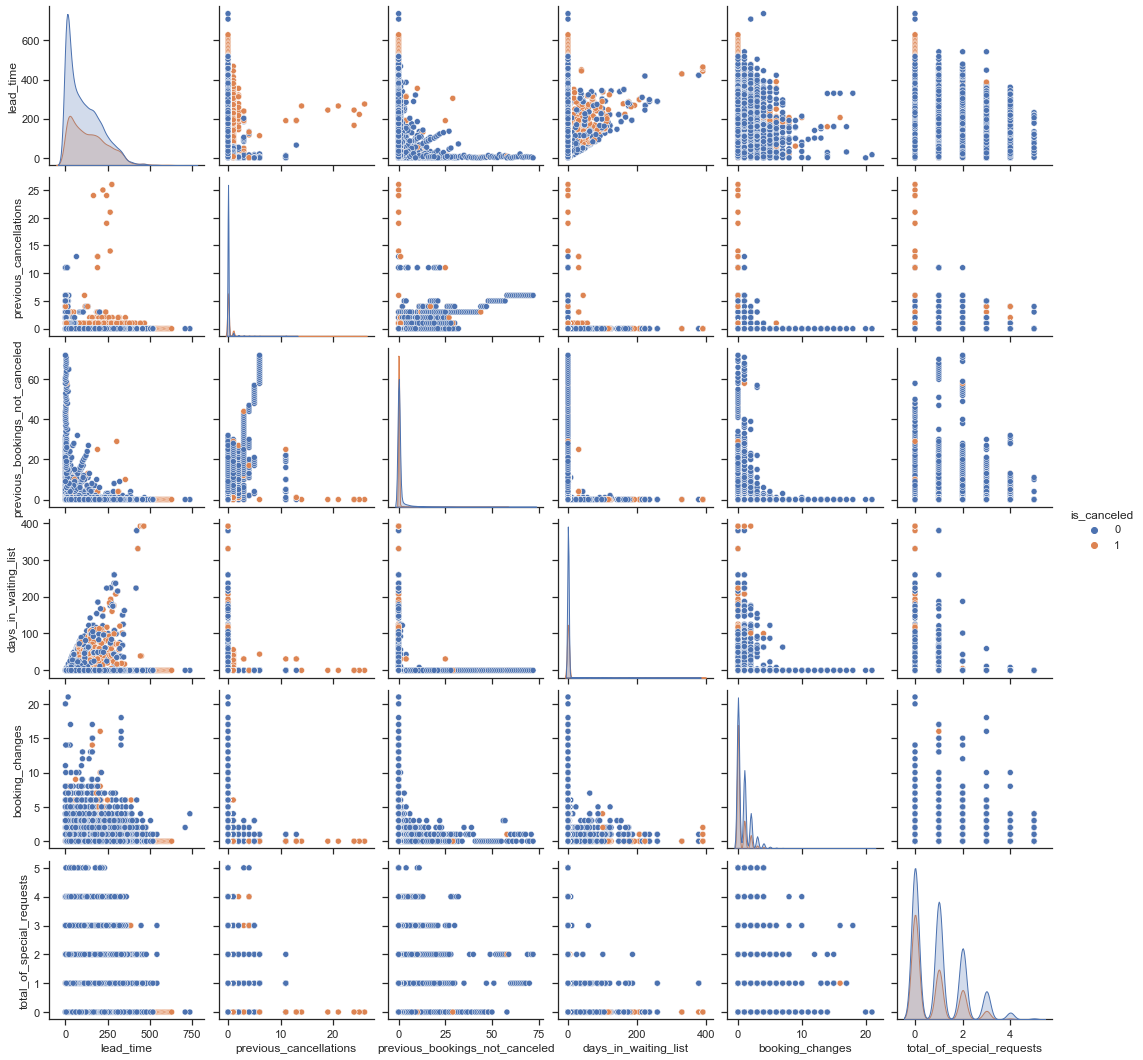

In [9]:
sns.pairplot(train, hue="is_canceled")

In [10]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
train['is_canceled'].unique()

array([0, 1], dtype=int64)

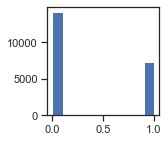

In [11]:
# Оценим дисбаланс классов для Occupancy
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train['is_canceled'])
plt.show()

In [12]:
train['is_canceled'].value_counts()

0    14113
1     7231
Name: is_canceled, dtype: int64

In [13]:
# посчитаем дисбаланс классов
total = train.shape[0]
class_0, class_1 = train['is_canceled'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 66.12%, а класс 1 составляет 33.879999999999995%.


In [14]:
train.columns

Index(['hotel', 'market_segment', 'deposit_type', 'lead_time',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'days_in_waiting_list', 'booking_changes', 'total_of_special_requests',
       'is_canceled'],
      dtype='object')

In [15]:
train.columns

Index(['hotel', 'market_segment', 'deposit_type', 'lead_time',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'days_in_waiting_list', 'booking_changes', 'total_of_special_requests',
       'is_canceled'],
      dtype='object')

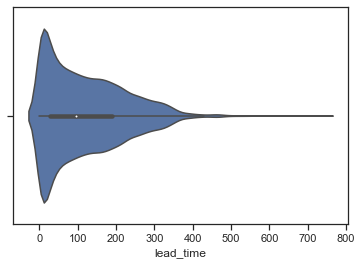

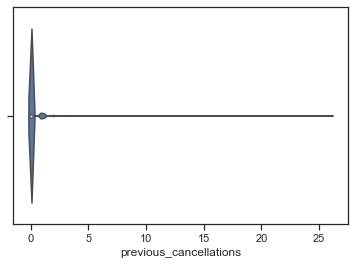

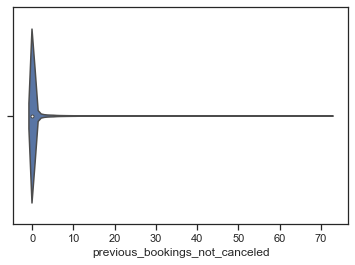

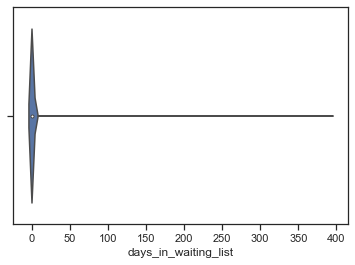

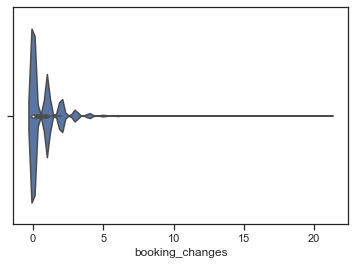

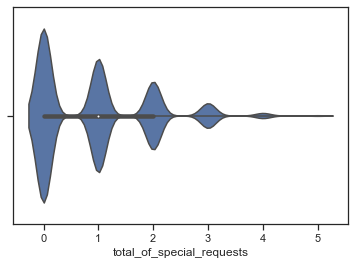

In [16]:
# Скрипичные диаграммы для числовых колонок
for col in ['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 
            'days_in_waiting_list', 'booking_changes', 'total_of_special_requests']:
    sns.violinplot(x=train[col])
    plt.show()

In [17]:
train.dtypes

hotel                             object
market_segment                    object
deposit_type                      object
lead_time                          int64
previous_cancellations             int64
previous_bookings_not_canceled     int64
days_in_waiting_list               int64
booking_changes                    int64
total_of_special_requests          int64
is_canceled                        int64
dtype: object

In [18]:
train['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [19]:
train["hotel"].value_counts()

City Hotel      11400
Resort Hotel     9944
Name: hotel, dtype: int64

In [20]:
train['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [21]:
train["market_segment"].value_counts()

Online TA        8728
Offline TA/TO    4198
Direct           3920
Groups           2162
Corporate        1774
Complementary     461
Aviation           99
Undefined           2
Name: market_segment, dtype: int64

In [22]:
train['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [23]:
train["deposit_type"].value_counts()

No Deposit    20540
Non Refund      756
Refundable       48
Name: deposit_type, dtype: int64

In [24]:
cleanup_T = {"hotel":     {"City Hotel": 0, "Resort Hotel": 1},
                "market_segment": {"Online TA": 0, "Offline TA/TO": 1, "Direct": 2, "Groups": 3,
                                  "Corporate": 4, "Complementary": 5, "Aviation":6, "Undefined":7},
                "deposit_type": {"No Deposit":0,"Non Refund":1,"Refundable":3}}

In [25]:
train = train.replace(cleanup_T)

In [26]:
train.head()

,hotel,market_segment,deposit_type,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled
0,1,2,0,342,0,0,0,3,0,0
1,1,2,0,737,0,0,0,4,0,0
2,1,2,0,7,0,0,0,0,0,0
3,1,4,0,13,0,0,0,0,0,0
4,1,0,0,14,0,0,0,0,1,0


In [27]:
train.dtypes

hotel                             int64
market_segment                    int64
deposit_type                      int64
lead_time                         int64
previous_cancellations            int64
previous_bookings_not_canceled    int64
days_in_waiting_list              int64
booking_changes                   int64
total_of_special_requests         int64
is_canceled                       int64
dtype: object

In [28]:
# Числовые колонки для масштабирования
scale_cols = ['hotel', 'market_segment', 'deposit_type', 'lead_time', 'previous_cancellations', 
              'previous_bookings_not_canceled', 'days_in_waiting_list']

In [29]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(train[scale_cols])

In [30]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    train[new_col_name] = sc1_data[:,i]

In [31]:
train.head()

,hotel,market_segment,deposit_type,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled,hotel_scaled,market_segment_scaled,deposit_type_scaled,lead_time_scaled,previous_cancellations_scaled,previous_bookings_not_canceled_scaled,days_in_waiting_list_scaled
0,1,2,0,342,0,0,0,3,0,0,1.0,0.285714,0.0,0.464043,0.0,0.0,0.0
1,1,2,0,737,0,0,0,4,0,0,1.0,0.285714,0.0,1.000000,0.0,0.0,0.0
2,1,2,0,7,0,0,0,0,0,0,1.0,0.285714,0.0,0.009498,0.0,0.0,0.0
3,1,4,0,13,0,0,0,0,0,0,1.0,0.571429,0.0,0.017639,0.0,0.0,0.0
4,1,0,0,14,0,0,0,0,1,0,1.0,0.000000,0.0,0.018996,0.0,0.0,0.0


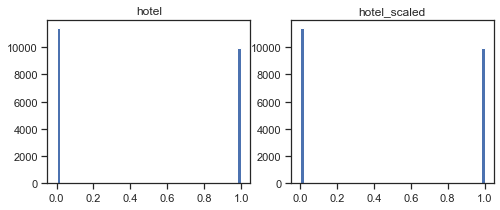

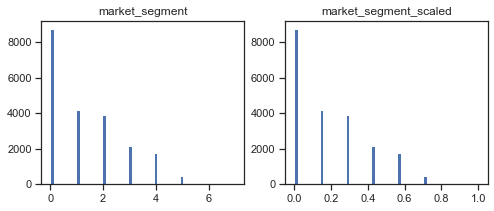

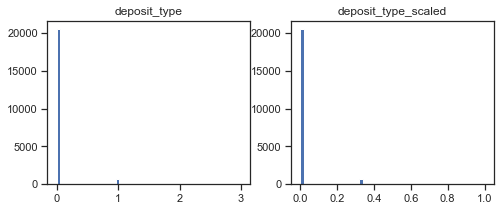

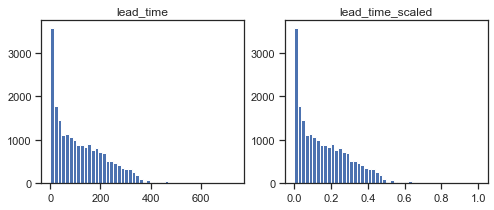

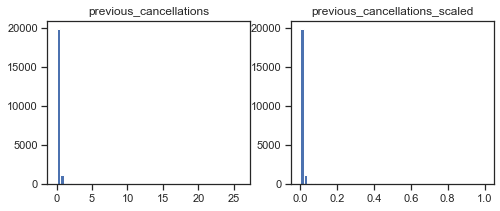

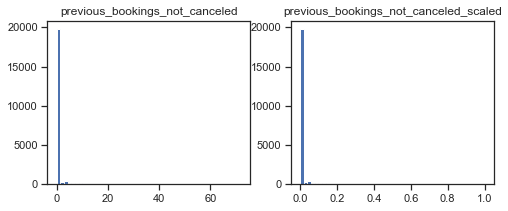

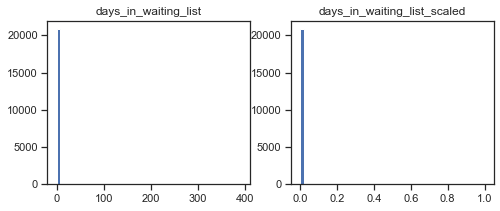

In [32]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(train[col], 50)
    ax[1].hist(train[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [33]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols + ['is_canceled']
corr_cols_1

['hotel',
 'market_segment',
 'deposit_type',
 'lead_time',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'days_in_waiting_list',
 'is_canceled']

In [34]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['is_canceled']
corr_cols_2

['hotel_scaled',
 'market_segment_scaled',
 'deposit_type_scaled',
 'lead_time_scaled',
 'previous_cancellations_scaled',
 'previous_bookings_not_canceled_scaled',
 'days_in_waiting_list_scaled',
 'is_canceled']

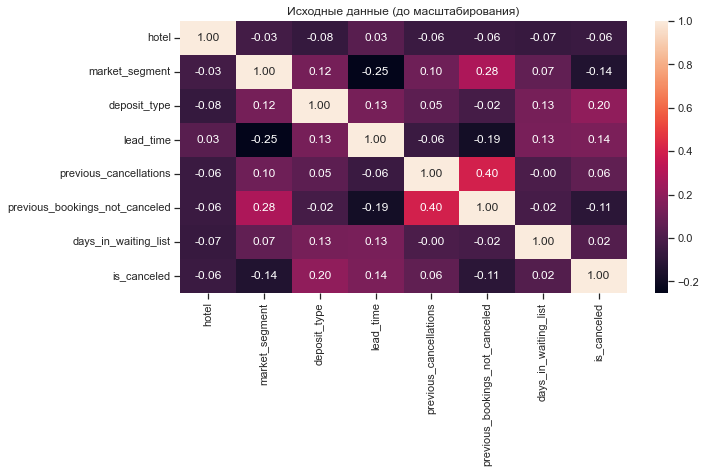

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(train[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

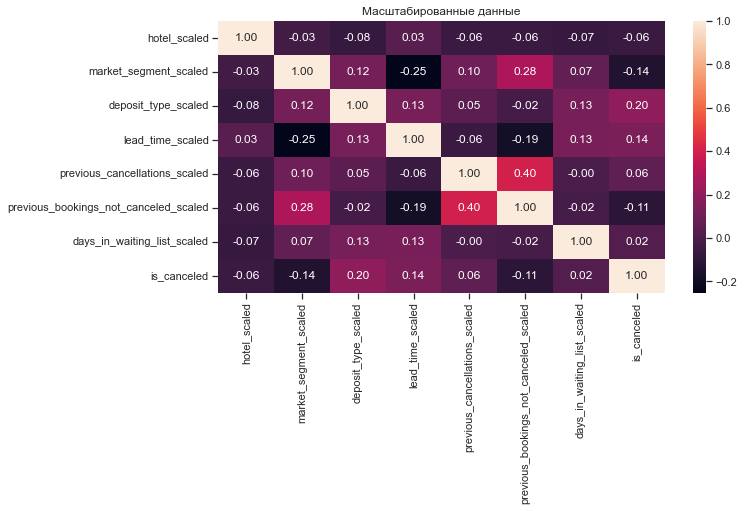

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(train[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

In [37]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

In [38]:
# Разделение выборки на обучающую и тестовую
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    train, train.is_canceled, test_size=0.2, random_state=1)

In [39]:
# Признаки для задачи классификации
task_clas_cols =  ['deposit_type', 'lead_time', 'previous_cancellations']

In [40]:
# Выборки для задачи классификации
clas_X_train = wine_X_train[task_clas_cols]
clas_X_test = wine_X_test[task_clas_cols]
clas_Y_train = wine_y_train
clas_Y_test = wine_y_test
clas_X_train.shape, clas_X_test.shape, clas_Y_train.shape, clas_Y_test.shape

((17075, 3), (4269, 3), (17075,), (4269,))

In [41]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [42]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [43]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [44]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(clas_X_train, clas_Y_train)
    # Предсказание значений
    Y_pred = model.predict(clas_X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(clas_X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(clas_Y_test.values, Y_pred)
    recall = recall_score(clas_Y_test.values, Y_pred)
    f1 = f1_score(clas_Y_test.values, Y_pred)
    roc_auc = roc_auc_score(clas_Y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(clas_Y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, clas_X_test, clas_Y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=Tr

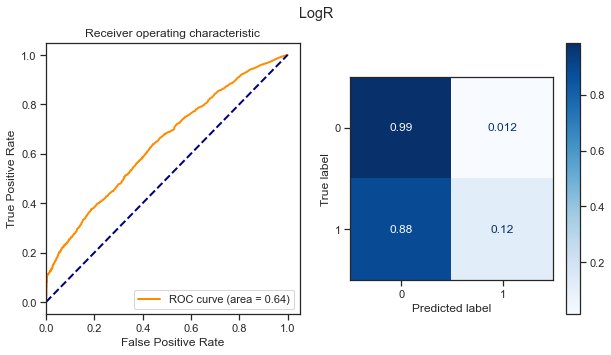

C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=Tr

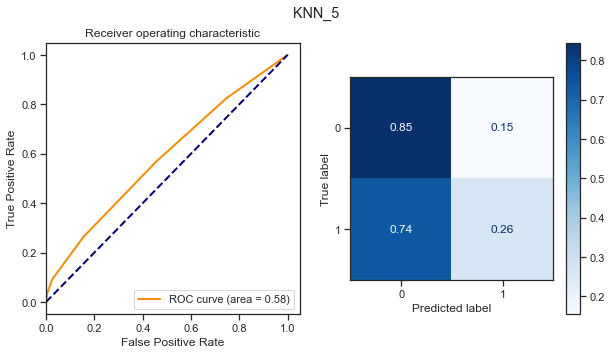

C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=Tr

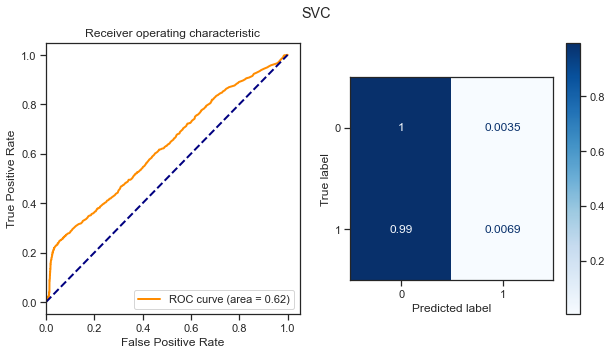

C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=Tr

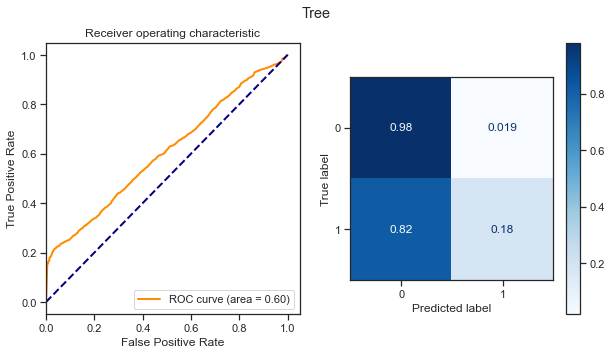

C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=Tr

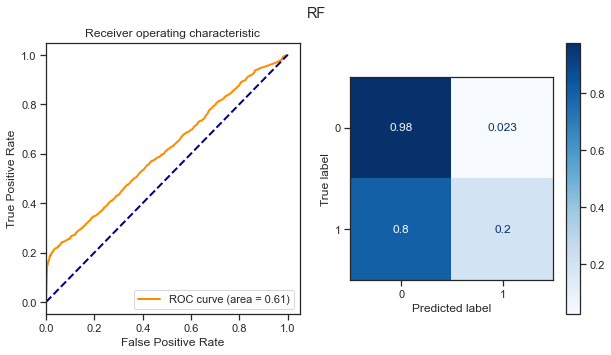

C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=Tr

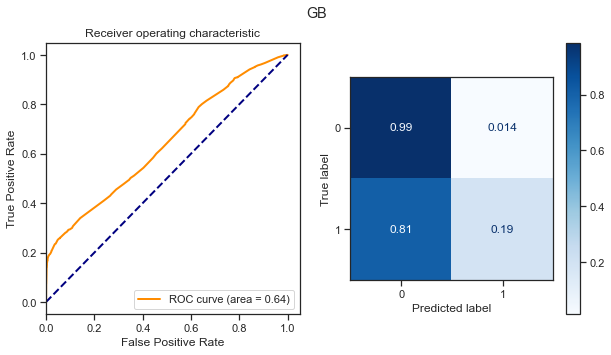

In [45]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [46]:
clas_X_train.shape

(17075, 3)

In [47]:
n_range_list = list(range(0,1250,50))
n_range_list[0] = 1

In [48]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
          550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
         1100, 1150, 1200])}]

In [49]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(clas_X_train, clas_Y_train)

CPU times: total: 54.8 s
Wall time: 55.1 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200])}],
             scoring='roc_auc')

In [50]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=150)

In [51]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 150}

In [52]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'150'

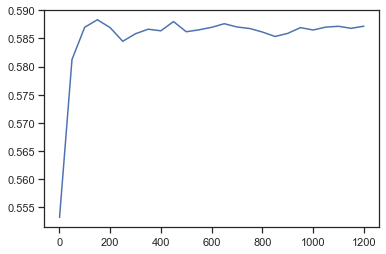

In [53]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [54]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5), 
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}


C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=Tr

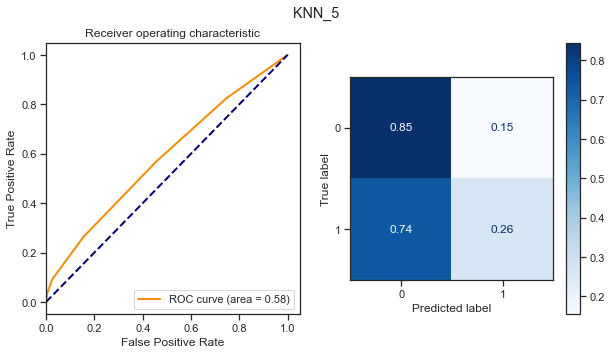

C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Kotos\AppData\Local\Temp\ipykernel_9404\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=Tr

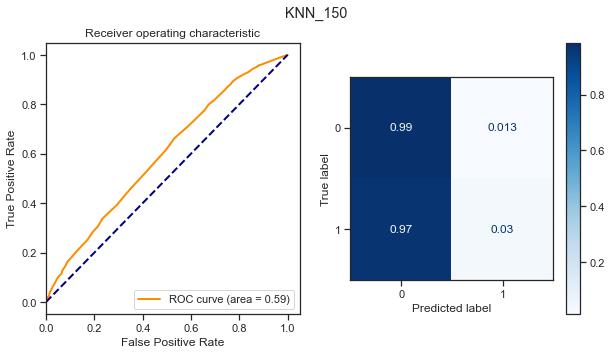

In [55]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [56]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

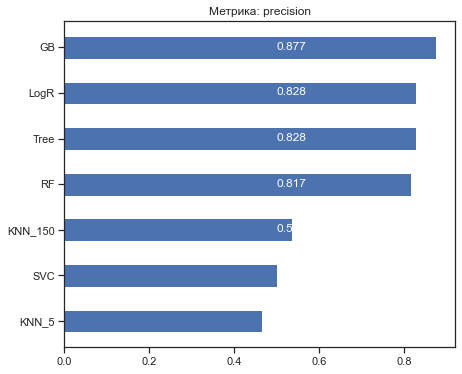

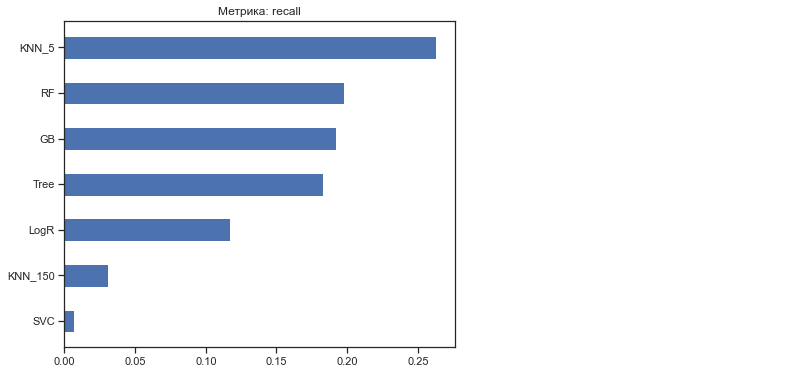

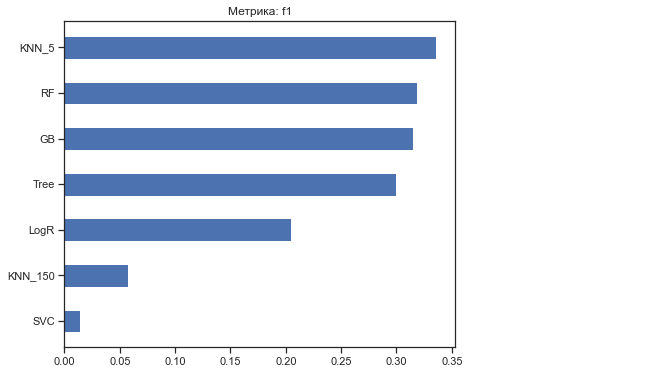

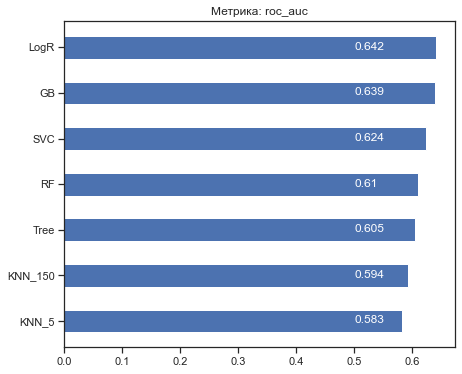

In [57]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))